In [1]:
import cv2
import PIL
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
test_list  = os.listdir('./skinTest')
train_list = os.listdir('./skinTrain')
print(train_list)

['Acne and Rosacea Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors']


In [3]:
train_list_mod = ['Acne and Rosacea Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors']

In [4]:
def data_dictionary():
    path_train="./skinTrain/"
    path_test="./skinTest/"
    list_train=train_list_mod#os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        path_disease_test=path_test+i
        image_list_train=os.listdir(path_disease_train)
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k) 
        for m in image_list_test :
            img_path_test=path_disease_test+"/"+m
            test_dictionary["image_path"].append(img_path_test)
            test_dictionary['target'].append(k)
        k+=1 
    test_df=pd.DataFrame(test_dictionary)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df,test_df

In [5]:
img = cv2.imread('./skinTrain/Acne and Rosacea Photos/07Acne081101.jpg')
img.shape

(472, 720, 3)

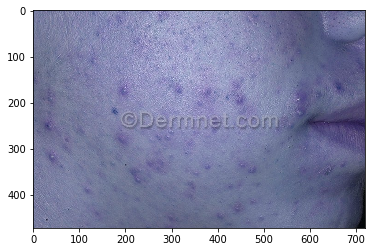

In [6]:
plt.imshow(img)

In [7]:
def load_data(input_size=(100,100)):
    images=[]
    images2=[]
    train_df,test_df=data_dictionary()
    for i in train_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images.append(img)
    y_train=np.asarray(train_df['target'])
    x_train=np.asarray(images)
    for i in test_df['image_path']:
        img=cv2.imread(i)
        img=cv2.resize(img,input_size)
        images2.append(img)
    y_test=np.asarray(test_df['target'])
    x_test=np.asarray(images2)
    return x_train,x_test,y_train,y_test

In [8]:
x_train,x_test,y_train,y_test=load_data(input_size=(100,100))


In [9]:
num_train=x_train.shape[0]
num_test=x_test.shape[0]
print(num_train)

6558


In [10]:
x_train_scaled = x_train/100
x_test_scaled = x_test/100
x_train_scaled.shape

(6558, 100, 100, 3)

In [19]:
model = Sequential([
    layers.Conv2D(20, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(40,3,padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(80,3,padding = 'same',activation  ='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(160, activation = 'relu'),
    layers.Dense(8, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
model.fit(x_train_scaled, y_train, epochs = 15, validation_data=(x_test_scaled,y_test))

Epoch 1/15
205/205 [==============================] - 135s 652ms/step - loss: 1.8283 - accuracy: 0.3159 - val_loss: 1.7682 - val_accuracy: 0.3536
Epoch 2/15
205/205 [==============================] - 74s 360ms/step - loss: 1.6924 - accuracy: 0.3776 - val_loss: 1.7600 - val_accuracy: 0.3496
Epoch 3/15
205/205 [==============================] - 71s 348ms/step - loss: 1.5899 - accuracy: 0.4257 - val_loss: 1.6514 - val_accuracy: 0.4074
Epoch 4/15
205/205 [==============================] - 64s 314ms/step - loss: 1.4488 - accuracy: 0.4852 - val_loss: 1.6413 - val_accuracy: 0.4052
Epoch 5/15
205/205 [==============================] - 62s 301ms/step - loss: 1.2718 - accuracy: 0.5526 - val_loss: 1.6970 - val_accuracy: 0.4470
Epoch 6/15
205/205 [==============================] - 67s 327ms/step - loss: 1.0880 - accuracy: 0.6182 - val_loss: 1.7511 - val_accuracy: 0.4510
Epoch 7/15
205/205 [==============================] - 65s 316ms/step - loss: 0.8843 - accuracy: 0.6927 - val_loss: 1.8369 - val_a

In [20]:
model.evaluate(x_test_scaled, y_test)

55/55 [==============================] - 5s 85ms/step - loss: 3.4427 - accuracy: 0.5381


[3.442723035812378, 0.5381088852882385]

In [21]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


NameError: name 'history' is not defined